<a href="https://colab.research.google.com/github/Anoop-A-Anto/SREAMLIT-ml-Webapps/blob/main/Employee_left_webapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*connect Runtime in colab as GPU if no of data rows are more than 50000 and columns more than 100*

# 1. ***Installing packages***

In [1]:
!pip install pycaret[full] --q

     |████████████████████████████████| 256kB 5.5MB/s 
     |████████████████████████████████| 266kB 7.6MB/s 
     |████████████████████████████████| 6.8MB 58.7MB/s 
     |████████████████████████████████| 1.8MB 47.4MB/s 
     |████████████████████████████████| 174kB 44.8MB/s 
     |████████████████████████████████| 65.8MB 60kB/s 
     |████████████████████████████████| 14.2MB 45.0MB/s 
     |████████████████████████████████| 102kB 12.7MB/s 
     |████████████████████████████████| 157.5MB 89kB/s 
     |████████████████████████████████| 1.6MB 42.5MB/s 
     |████████████████████████████████| 276kB 56.9MB/s 
     |████████████████████████████████| 3.5MB 36.7MB/s 
     |████████████████████████████████| 266kB 64.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 11.3MB/s 
     |████████████████████████████████| 327kB 53.4MB/s 
     |██████████████████████████████

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
import pycaret

In [4]:
pycaret.__version__

'2.2.0'

In [5]:
!pip install pandas-profiling==2.8.0  -q

     |████████████████████████████████| 266kB 7.9MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 


In [6]:
import pandas as pd

In [7]:
import pandas_profiling 

In [8]:
pandas_profiling.__version__

'2.8.0'

In [9]:
#df=pd.read_csv("/content/employee.csv") ##--for website csv data ,upload first into colab folder space on the left and copy it's path
#pandas_profiling.ProfileReport(df)

# 2. ***Data Collection***

Data Set can be imported in MUltiple Ways. Ex - 1 - Using Pandas lib(For importing any csv file, either from local computer / from interent sites)
2 -(Pycaret lib- have much data sets within itself ) Dataset contained only inside pycaret lib can be downloaded using the below code.

**From Pycaret.datasets import get_data**

DataFrame= get_data("dataset_name")#dataset_name should be only of the data sets contained inside pycaret lib, not any other external csv files.


Here, we will use ‘employee’ dataset and the goal is to predict whether employee will leave or not (binary 1 or 0) based on several factors . The dataset is available on PyCaret’s github repository. Easiest way to import dataset directly from repository is by using get_data function from pycaret.datasets module.

In [10]:

#Once the installation is done, we will load the dataset as follows. 
from pycaret.datasets import get_data
dataset = get_data('employee')

satisfaction_level  last_evaluation  number_project  ...  department  salary  left
0                0.38             0.53               2  ...       sales     low     1
1                0.80             0.86               5  ...       sales  medium     1
2                0.11             0.88               7  ...       sales  medium     1
3                0.72             0.87               5  ...       sales     low     1
4                0.37             0.52               2  ...       sales     low     1

[5 rows x 10 columns]

# 3. ***Data Preprocessing***

**Exploratory Data Analysis** 

In [11]:
pandas_profiling.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Drop Duplicates**

In [12]:
dataset.drop_duplicates(keep="first",inplace=True,ignore_index=True)

In [13]:
dataset.shape#Duplicate rows removed

(11991, 10)

**If y value / target column is having any missing values then that entire row should be removed using**

DataFrame.dropna(subset=['left'],axis=0,how='any', inplace= True,igonre_index=True)

Note : Missing in other columns will be treated by pycaret


In [14]:
dataset.dropna(subset=['left'],axis=0,how='any', inplace= True)#checks for missing in target column

In [15]:
dataset.reset_index(drop=True)#resetting index

satisfaction_level  last_evaluation  ...  salary  left
0                    0.38             0.53  ...     low     1
1                    0.80             0.86  ...  medium     1
2                    0.11             0.88  ...  medium     1
3                    0.72             0.87  ...     low     1
4                    0.37             0.52  ...     low     1
...                   ...              ...  ...     ...   ...
11986                0.90             0.55  ...    high     0
11987                0.74             0.95  ...    high     0
11988                0.85             0.54  ...    high     0
11989                0.33             0.65  ...    high     0
11990                0.50             0.73  ...     low     0

[11991 rows x 10 columns]

**seperating some data from a dataframe for future Prediction**

In [16]:
#After exporting to csv download it and using Excel cut & seperate some data-
#from this file into new csv for unseen predictions and upload again replacing old files
dataset.to_csv("/content/employee-fulldataset.csv")

In [17]:
dataset=pd.read_csv("/content/employee-dataset-train.csv")


data_unseen=pd.read_csv("/content/employee-dataset-unseen.csv")

In [18]:
###Temporay way without using excel
# data_seen = dataset.sample(frac=0.95, random_state=780).reset_index(drop=True)
# data_unseen = dataset.drop(data_seen.index).reset_index(drop=True)
# dataset=dataset.drop(['department','average_montly_hours'],axis=1)
# print('Data for Modeling: ' + str(data_seen.shape))
# print('Unseen Data For Predictions: ' + str(data_unseen.shape))

**Splitting data**

In [19]:
X = dataset.drop(['left'], axis=1) #split data to independent 
y = dataset['left']#splitting target column

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)
#random_state ensures same shuffling method to recreate same results in next run.
#stratify ensures output classes are divided to train and test in equal ratio

## Handling Imbalanced data for training

In [21]:
y_train.value_counts()

0    7999
1    1593
Name: left, dtype: int64

In [22]:
y_test.value_counts()

0    2001
1     398
Name: left, dtype: int64

**Using imbalanced-learn package for adjusting data count in minority class with majority class**

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
#creates random copies to make minority class equal to percentage of majprity class
ros = RandomOverSampler(random_state=123,sampling_strategy=0.5)

x_train, y_train = ros.fit_resample(x_train, y_train)

In [25]:
y_train.value_counts()

0    7999
1    3999
Name: left, dtype: int64

In [26]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
#Removes random data rows from majority class rows to make minority class equal to percentage of majority class
rus =RandomUnderSampler(random_state=123,sampling_strategy="not minority")
x_train, y_train = rus.fit_resample(x_train, y_train)

In [28]:
y_train.value_counts()

1    3999
0    3999
Name: left, dtype: int64

Combining x and y data into train and test

In [29]:
y_train.index

RangeIndex(start=0, stop=7998, step=1)

In [30]:
train=pd.merge(x_train,y_train,left_index=True,right_index=True).reset_index(drop=True)

In [31]:
train

satisfaction_level  last_evaluation  ...  salary  left
0                   0.84             0.48  ...  medium     0
1                   0.74             0.91  ...     low     0
2                   0.78             0.51  ...  medium     0
3                   0.69             0.98  ...  medium     0
4                   0.94             0.60  ...  medium     0
...                  ...              ...  ...     ...   ...
7993                0.86             0.98  ...     low     1
7994                0.44             0.49  ...     low     1
7995                0.91             0.97  ...     low     1
7996                0.40             0.46  ...  medium     1
7997                0.10             0.85  ...     low     1

[7998 rows x 10 columns]

In [32]:
test=pd.merge(x_test,y_test,left_index=True,right_index=True).reset_index(drop=True)

In [33]:
test

satisfaction_level  last_evaluation  ...  salary  left
0                   0.82             0.95  ...  medium     0
1                   0.18             0.86  ...  medium     0
2                   0.63             0.98  ...  medium     0
3                   0.43             0.51  ...  medium     1
4                   0.51             0.98  ...  medium     0
...                  ...              ...  ...     ...   ...
2394                0.61             0.95  ...  medium     0
2395                0.94             0.59  ...  medium     0
2396                0.96             0.68  ...  medium     0
2397                0.75             0.90  ...  medium     0
2398                0.31             0.42  ...     low     0

[2399 rows x 10 columns]

##   **Pycaret Preprocessing**

### Setting up Environment

The first step of any machine learning experiment in PyCaret is setting up the environment by importing the required module and initializing setup( ). The module used in this example is pycaret.classification.
Once the module is imported, setup() is initialized by defining the dataframe (‘diabetes’) and the target variable (‘Class variable’).


**We have to understand which type of prediction is to be done by checking whether our target column is qualititave(classes like 0/1 , yes/no , Low-Medium-High , country names etc)  or Quantitative ( Amount of rainfall , stock market value, revenue, house price). Classification is for Qualitative Target Column and Regression is for Quantitative Target column.**

In [34]:
from pycaret.classification import setup,compare_models,create_model,tune_model,finalize_model,save_model,predict_model,models

**Default Data Preparation step Done automatically by Pycaret lib.**

1.- Replacing missing values( numeric column by Mean, categorical values by Not available)

2-Training /Testing by 70:30 

3- Label encoding (text to Number)

4 -handle_unknown_categorical: default = True

5 - Random data selecting method given as session_id=123


**Step Must to activate within Pycaret by Us**

1-Transformation 

2- Normailzation 

3- Remove multi colinearity 

4- Remove outliers 

5- If Data types have not been infered correctly we should specify which columns to change the data type.

6- Categorical values can be replaced by MODE value.

7- Train /Test data splitiing ratio can be changed by us. 60:40 

8 - Test_data can be passed to setup. Train /Test data-splitting will be overrided here

9 - Ignore low variance

10 -stratiy ->data_split_stratify=True

11 - fix_imbalance=True

12 - use gpu =True

**Optional -**
dataset columns can be converted forcefully to ordinal,numerical,categorical etc. and high cardinality features can also be passed.

columns can be ignored

In [35]:
from imblearn.over_sampling import  ADASYN,SMOTE
ad=ADASYN(random_state=123,sampling_strategy="minority")
sm=SMOTE(random_state=123,sampling_strategy="minority")



In [36]:
preprocessed_data =setup(data = train, target = 'left',test_data=test, session_id=123,
                  normalize=True,transformation=True,
                  remove_multicollinearity=True,
                  remove_outliers=True,
                  categorical_imputation="mode",
                  ignore_low_variance=True,
                  data_split_stratify=True,                                 
                  use_gpu=True)

Description             Value
0                               session_id               123
1                                   Target              left
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data        (7998, 10)
5                           Missing Values             False
6                         Numeric Features                 3
7                     Categorical Features                 6
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (7599, 27)
12                    Transformed Test Set        (2399, 27)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test              True
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU              True
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              3c2b
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer              mode
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation              True
32                   Transformation Method       yeo-johnson
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance              True
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers              True
41                      Outliers Threshold              0.05
42                Remove Multicollinearity              True
43             Multicollinearity Threshold               0.9
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                           Fix Imbalance             False
57                    Fix Imbalance Method             SMOTE

#4.  ***Data Processing***

In [37]:
compare_models(include=['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm','rf'])

Model  Accuracy     AUC  Recall   Prec.      F1  \
rf      Random Forest Classifier    0.9914  0.9974  0.9906  0.9924  0.9915   
dt      Decision Tree Classifier    0.9754  0.9753  0.9916  0.9609  0.9760   
knn       K Neighbors Classifier    0.9409  0.9772  0.9592  0.9262  0.9423   
rbfsvm       SVM - Radial Kernel    0.9374  0.9760  0.9292  0.9456  0.9373   
svm          SVM - Linear Kernel    0.9089  0.0000  0.9449  0.8828  0.9127   
lr           Logistic Regression    0.9068  0.9327  0.9436  0.8803  0.9107   
nb                   Naive Bayes    0.7218  0.9147  0.5033  0.9007  0.6454   

         Kappa     MCC  TT (Sec)  
rf      0.9829  0.9830     1.325  
dt      0.9508  0.9514     0.046  
knn     0.8818  0.8826     0.422  
rbfsvm  0.8747  0.8750     4.865  
svm     0.8178  0.8200     0.131  
lr      0.8135  0.8159     0.088  
nb      0.4454  0.4969     0.019

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Model creation and obtaining kfold results**

selected rf model since it is having top performance. Since this is imbalanced dataset we take F1 Score measure instead of accuracy as our metric

In [38]:
rf=create_model('rf',fold=20)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9842  0.9930  0.9791  0.9894  0.9842  0.9684  0.9685
1       0.9921  0.9980  0.9895  0.9947  0.9921  0.9842  0.9842
2       0.9921  0.9999  0.9843  1.0000  0.9921  0.9842  0.9843
3       0.9816  0.9959  0.9686  0.9946  0.9814  0.9632  0.9635
4       0.9842  0.9956  0.9738  0.9947  0.9841  0.9684  0.9686
5       0.9816  0.9907  0.9686  0.9946  0.9814  0.9632  0.9635
6       0.9868  0.9936  0.9843  0.9895  0.9869  0.9737  0.9737
7       0.9763  0.9901  0.9581  0.9946  0.9760  0.9526  0.9533
8       0.9974  1.0000  1.0000  0.9948  0.9974  0.9947  0.9948
9       0.9974  0.9999  1.0000  0.9948  0.9974  0.9947  0.9948
10      0.9974  1.0000  1.0000  0.9948  0.9974  0.9947  0.9948
11      0.9921  0.9995  1.0000  0.9845  0.9922  0.9842  0.9843
12      0.9947  1.0000  1.0000  0.9897  0.9948  0.9895  0.9895
13      0.9921  1.0000  1.0000  0.9846  0.9922  0.9842  0.9843
14      0.9868  1.0000  1.0000  0.9746  0.9871  0.9737  0.9740
15      0.9974  1.0000  1.0000  0.9948  0.9974  0.9947  0.9947
16      0.9974  1.0000  1.0000  0.9948  0.9974  0.9947  0.9947
17      0.9947  0.9999  1.0000  0.9897  0.9948  0.9895  0.9895
18      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
19      0.9947  0.9987  1.0000  0.9896  0.9948  0.9894  0.9895
Mean    0.9911  0.9977  0.9903  0.9919  0.9911  0.9821  0.9822
SD      0.0065  0.0033  0.0134  0.0057  0.0066  0.0130  0.0129

In [39]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Hyperparameter tuning**

NOTE :will take some time !

In [40]:
tuned_model = tune_model(rf,optimize="F1",early_stopping=True,
                         custom_grid={"n_estimators":[i for i in range(50,300)]},
                         choose_better=True,tuner_verbose=True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9882  0.9951  0.9817  0.9947  0.9881  0.9763  0.9764
1       0.9855  0.9978  0.9791  0.9920  0.9855  0.9711  0.9711
2       0.9829  0.9932  0.9713  0.9947  0.9828  0.9658  0.9661
3       0.9829  0.9901  0.9713  0.9947  0.9828  0.9658  0.9661
4       0.9974  1.0000  1.0000  0.9948  0.9974  0.9947  0.9948
5       0.9947  0.9984  1.0000  0.9897  0.9948  0.9895  0.9895
6       0.9947  1.0000  1.0000  0.9897  0.9948  0.9895  0.9895
7       0.9947  0.9999  1.0000  0.9897  0.9948  0.9895  0.9895
8       0.9961  1.0000  1.0000  0.9922  0.9961  0.9921  0.9921
9       0.9974  0.9994  1.0000  0.9948  0.9974  0.9947  0.9947
Mean    0.9914  0.9974  0.9903  0.9927  0.9915  0.9829  0.9830
SD      0.0056  0.0033  0.0122  0.0022  0.0057  0.0112  0.0112

In [41]:
tuned_model#AFTER TUNING best no of estimators found as 148 instead of DEFAULT 100 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [42]:
final = finalize_model(tuned_model)

In [43]:
from pycaret.classification import plot_model

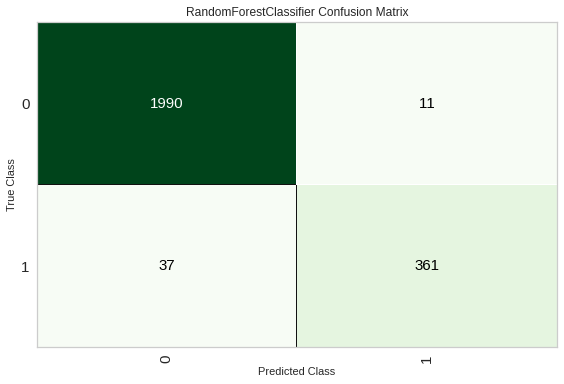

In [44]:
plot_model(final,plot="confusion_matrix")#save=True)

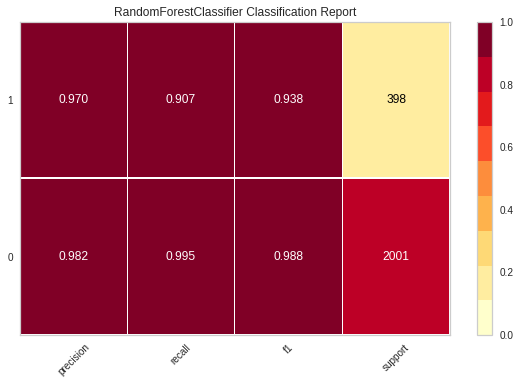

In [45]:
plot_model(final,plot="class_report")#save=True)

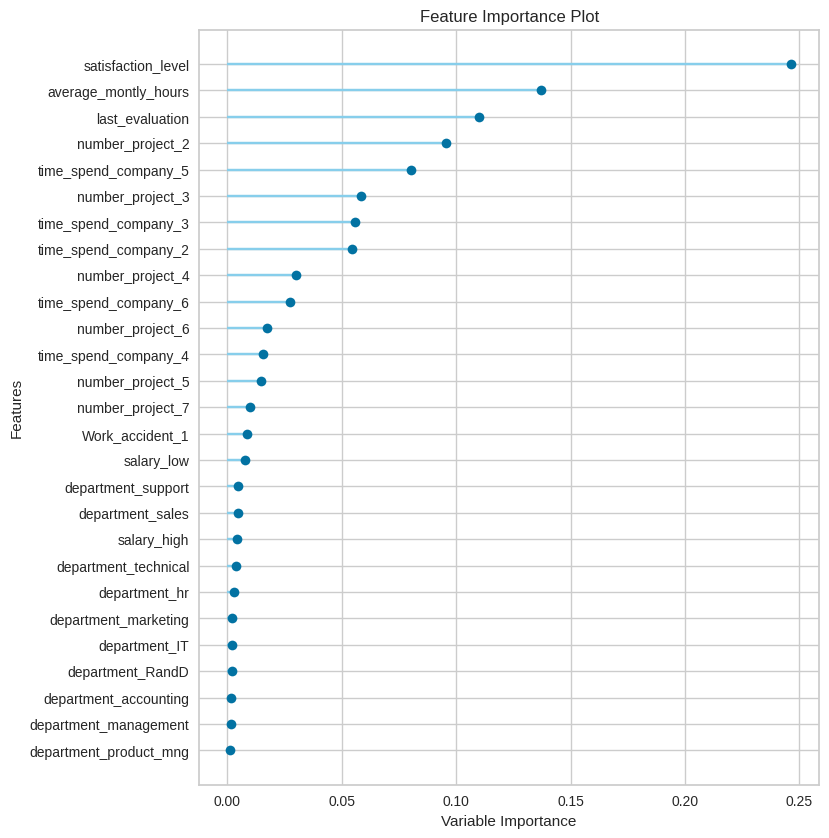

In [46]:
plot_model(final,plot="feature_all")

In [ ]:
#Predictions are in Label column. Columns in unseen data other than independent columns used for training are ignored 
unseen_predictions = predict_model(final, data=data_unseen)
unseen_predictions.head()

In [ ]:
unseen_predictions.to_csv("/content/unseen-predictions.csv")

**Pickling ml model file as output file for future use**

Note: This prevents model from training again and again

In [ ]:
save_model(final,'Final_model')

#5. ***Data Post Processing*** 

***below codes can be run in seperate colab notebook also!!***

Webapp should be prepared using standard streamlit code in idle and imported to this colab instance as python file only.Used images and model.pkl file should also be uploaded for testing 

### Frontend code

In [ ]:
!pip install pycaret --q

In [ ]:
pip install --upgrade streamlit -q

In [ ]:
!pip install ipykernel==4.10 # only for colab ,and after this please restart

In [ ]:
import streamlit#For checking correct installation of streamlit

In [ ]:
!pip install pyngrok -q #Testing temporary web server provider

In [ ]:
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np
model = load_model('Final_model')

In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(port='80')
print (public_url)

stream_employeetest1.py attached in github

In [ ]:
!streamlit run --server.port 80 stream_employeetest1.py >/dev/null

**click on the ngrok.io url above**